# <b>A. <span style='color:#0B2F9F'><code>PREFIX</code></span></b>
Prefix merupakan penggunaan awalan pada nama tabel untuk memberikan informasi tambahan atau untuk mengelompokkan objek-objek tertentu. Sebagai contoh perhatikan gambar berikut : <br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/SQL%20-%20Prefix.png" width="50%">

<br><br>
Nama tabel dimisalkan (diberi alias) sebagai tbl, lalu untuk mengakses kolom pada tabel tersebut bisa diberi prefix tbl.kolom1 dan seterusnya

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, ambil kolom customer_id, gender, age dan married namun gunakan alias 'cdm' pada nama tabel dan sematkan prefixnya saat mengakses kolom!</b></i>

In [ ]:
SELECT
  cdm.customer_id,
  cdm.gender,
  cdm.age,
  cdm.married,
FROM telco_churn.customer_demography AS cdm

customer_id,gender,age,married
8779-QRDMV,Male,78,No
7495-OOKFY,Female,74,Yes
1658-BYGOY,Male,71,No
4598-XLKNJ,Female,78,Yes
4846-WHAFZ,Female,80,Yes
4412-YLTKF,Female,72,No
0390-DCFDQ,Female,76,Yes
3445-HXXGF,Male,66,Yes
2656-FMOKZ,Female,70,No
2070-FNEXE,Female,77,No


# <b>B. <span style='color:#0B2F9F'><code>JOIN</code></span></b>

Data biasanya disimpan di berbagai tabel atau sistem yang berbeda pada RDBMS (Relational Database Management System). JOIN memungkinkan pengguna untuk menggabungkan data dari berbagai sumber untuk mendapatkan gambaran yang lebih lengkap. Memahami query JOIN memungkinkan seorang pengguna untuk mengintegrasikan dan menganalisis data secara efektif, sehingga dapat meningkatkan kualitas analisis dan mendukung pengambilan keputusan berbasis data.

Operasi JOIN standar dapat dilakukan jika terdapat kunci pada tiap tabel yang saling terhubung. Operasi join dasar yang paling umum digunakan ada 4 yakni :
<ul>
    <li><b>LEFT JOIN</b></li>
    LEFT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kiri (tabel pertama) dan baris yang cocok dari tabel kanan (tabel kedua). Jika tidak ada kecocokan di tabel kanan, maka nilai-nilai untuk kolom dari tabel kanan akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/left-join-extra.gif" width="20%">
    <br><br>
    <li><b>RIGHT JOIN</b></li>
    RIGHT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kanan (tabel kedua) dan baris yang cocok dari tabel kiri (tabel pertama). Jika tidak ada kecocokan di tabel kiri, maka nilai-nilai untuk kolom dari tabel kiri akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/right-join.gif" width="20%">
    <br><br>
    <li><b>INNER JOIN</b></li>
    INNER JOIN adalah jenis operasi penggabungan yang hanya mengembalikan baris yang memiliki kecocokan di kedua tabel berdasarkan kriteria tertentu.<br><br>
    <img src="https://thomasadventure.blog/img/inner-join.gif" width="20%">
    <br><br>
     <li><b>FULL JOIN</b></li>
    FULL JOIN adalah jenis operasi penggabungan semua baris dari kedua tabel, baik yang memiliki kecocokan maupun yang tidak. Dengan demikian, hasilnya akan mencakup semua data dari tabel kiri dan tabel kanan.<br><br>
    <img src="https://thomasadventure.blog/img/full-join.gif" width="20%">
    <br><br>
</ul>

#### <i><b><span style='color:#55679C'>Pre-Quest</span>
Untuk melakukan join biasanya akan lebih mudah jika arsitektur relasi antar tabel atau biasa dikenal ERD (Entity Relational Diagram) telah dibuat atau diketahui. Pada data telco churn ERD-nya disajikan pada gambar berikut<br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/ERD%20-%20Telco%20Churn.png" width="40%">

#### <i><b><span style='color:#55679C'>Quest : </span>Hitung berapa rata-rata biaya bulanan tiap status customer! Tampilkan status, total_customer, avg_monthly_charge! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  sts.status,
  COUNT(sts.customer_id) AS total_customer,
  ROUND(AVG(srv.monthly_charge), 2) AS avg_monthly_charge
FROM telco_churn.customer_status AS sts
LEFT JOIN telco_churn.telco_services AS srv ON sts.customer_id = srv.customer_id
GROUP BY sts.status
ORDER BY status ASC

status,total_customer,avg_monthly_charge
Churned,1869,74.44
Joined,454,43.47
Stayed,4720,62.98


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Didapatkan bahwa customer yang masih berlangganan lebih banyak dibandingakan customer yang berhenti berlangganan dan yang baru mulai berlangganan. Rata-rata biaya yang perlu dibayar untuk berlangganan lebih murah saat customer baru memulai berlangganan dibandingkan customer yang berhenti berlangganan dan masih berlangganan.

#### <i><b><span style='color:#55679C'>Quest : </span>Coba Sudut Pandang Lebih Luas; Hitung berapa banyak customer, rata-rata biaya bulanan & rata-rata umur tiap status customer, gender dan status pernikahannya! Tampilkan status, gender, married, total_customer, avg_monthly_charge! Urutkan hasilnya per metrik perhitungan dan Interpretasikan insight dari hasil perhitungan!

In [ ]:
WITH customer_data AS (
  SELECT
    customer_id,
    gender,
    married
  FROM telco_churn.customer_demography
)
SELECT
  sts.status,
  demo.gender,
  demo.married,
  COUNT(sts.customer_id) AS total_customer,
  ROUND(AVG(srv.monthly_charge), 2) AS avg_monthly_charge
FROM telco_churn.customer_status AS sts
LEFT JOIN telco_churn.telco_services AS srv
  ON sts.customer_id = srv.customer_id
RIGHT JOIN customer_data AS demo
  ON sts.customer_id = demo.customer_id
GROUP BY sts.status, demo.gender, demo.married
ORDER BY sts.status, demo.gender ASC

status,gender,married,total_customer,avg_monthly_charge
Churned,Female,Yes,319,78.0
Churned,Female,No,620,73.17
Churned,Male,Yes,350,81.45
Churned,Male,No,580,69.61
Joined,Female,Yes,46,43.75
Joined,Female,No,165,43.47
Joined,Male,Yes,38,48.11
Joined,Male,No,205,42.55
Stayed,Female,Yes,1323,64.67
Stayed,Female,No,1015,61.51


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
customer yang berhenti berlangganan kebannyakan dari customer wanita yang belum menikah dengan rata-rata biaya langganan terbesar berada di customer pria yang sudah menikah. Customer yang baru mulai berlangganan lebih banyak di customer pria yang belum menikah dan rata-rata biaya langganan terbesar berada di customer pria yang sudah menikah. Customer terbanyak yang masih bertahan untuk berlangganan berada di customer pria yang sudah menikah dan rata-rata biaya berlanggana terbesar berada di customer pria yang sudah menikah.

#### <i><b><span style='color:#55679C'>Quest : </span>Bagaimana dengan total tenure ? Hitung berapa rata-rata tenure_in_month tiap status customer! Tampilkan status, total_customer, avg_tenure_in_month! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  sts.status,
  COUNT(sts.customer_id) AS total_customer,
  ROUND(AVG(srv.tenure_in_months), 2) AS avg_tenure_in_months
FROM telco_churn.customer_status AS sts
LEFT JOIN telco_churn.telco_services AS srv
  ON sts.customer_id = srv.customer_id
GROUP BY sts.status
ORDER BY sts.status ASC

status,total_customer,avg_tenure_in_month
Churned,1869,17.98
Joined,454,1.72
Stayed,4720,41.04


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Customer yang memiliki rata-rata waktu paling lama berlangganan berada di customer yang masih berlangganan. Customer yang memiliki rata-rata waktu paling sebentar untuk berlangganan adalah customer yang baru saja mulai berlangganan.

#### <i><b><span style='color:#55679C'>Quest : </span>Perusahaan telekomunikasi ingin melakukan perluasan market ke beberapa daerah yang mana di daerah tersebut belum ada pelanggan terdaftar dalam database. Buatkan daftar kode pos pada tabel population yang sama sekali belum ada orang yang menggunakan layanan telekomunikasi! Tampilkan kode pos dan jumlah populasinya!

In [ ]:
SELECT
  popu.zip_code,
  SUM(popu.population) AS population,
  COUNT(loc.customer_id) AS total_customer
FROM telco_churn.customer_location AS loc
RIGHT JOIN telco_churn.population AS popu
  ON loc.zip_code = popu.zip_code
GROUP BY popu.zip_code
HAVING total_customer = 0
ORDER BY population DESC

zip_code,population,total_customer
91402,66249,0
95023,47514,0
90020,42394,0
92307,31876,0
93555,29782,0
95531,23792,0
92277,17178,0
96161,15783,0
93640,9174,0
96064,4592,0


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Berdasarkan data diatas, jumlah populasi yang belum terdaftar sebagai customer berdasarkan kota yang belum terdaftar sebagai customer satu pun, mencapai 66 ribu penduduk. Hal ini dapat menjadi pertimbangan perusahaan untuk memperluas jangkauan telekomunikasi dengan mempertimbangkan biaya dan profit.

#### <i><b><span style='color:#55679C'>Quest 1 (From DQSquad): </span> Identifikasi daerah atau kota yang memiliki tingkat churn tertinggi! (From Kak *Tiffany*)

In [ ]:
SELECT
  loc.city,
  st.status,
  COUNT(loc.customer_id) AS total_customer_churned
FROM telco_churn.customer_location AS loc
LEFT JOIN telco_churn.customer_status AS st
  ON loc.customer_id = st.customer_id
GROUP BY loc.city, st.status
HAVING st.status = "Churned"
ORDER BY total_customer_churned DESC

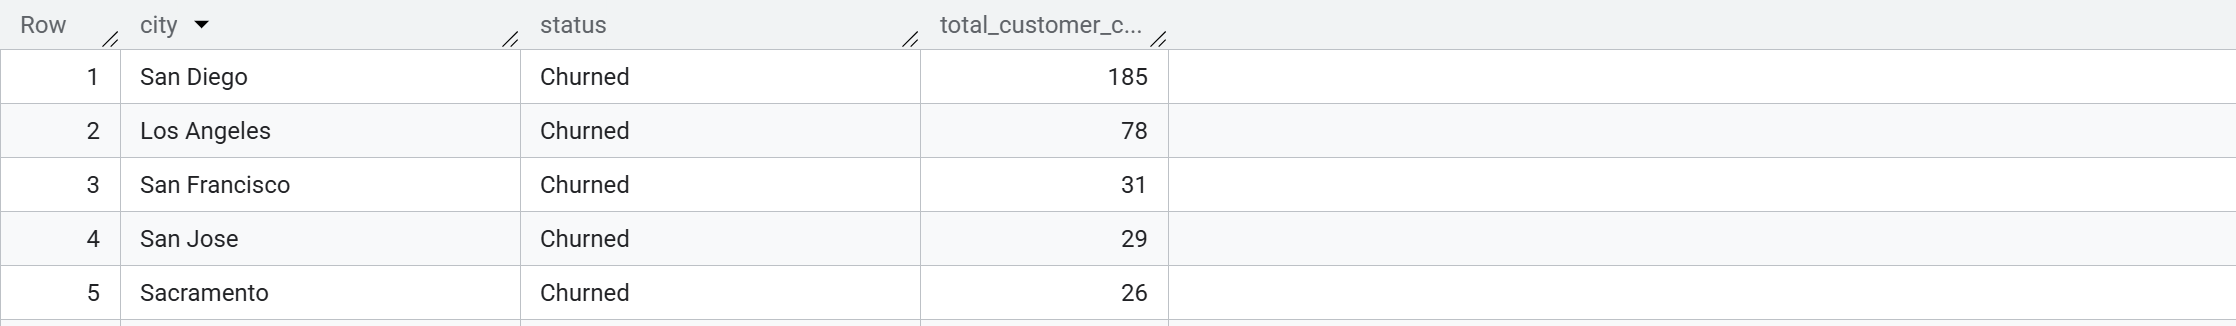

<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Dapat dilihat, bahwa Kota San Diego merupakan kota dengan tingkat churned tertinggi. Jumlah customer yang melakukan churn hampir 200 customer dengan total pasti 185. Hal ini sangat berbeda denga Los Angeles yang memiliki jumalh customer churned tidak sampai 100 customer dengan total pasti 78


---
Powered by : <br>
<img src="https://lh3.googleusercontent.com/ayfbbgvQolM_Ys9VYRVFD6FjDJXSebI9sN1VtY4ppp65dXepA6JCKgKMM_porWAErGQmc8l-L_RXq080SJ3FbYTIsyxYqWWTuAX8A3VtafWLUwAnnxNnjR1s-3BMCUlF34fYnViLuutxrLm3nEpoix0" width="20%">
<br><br>
<a href="https://www.linkedin.com/in/andrianidg/"><img src="https://img.shields.io/badge/-© 2025 Andriani Dwiadnra Giana-417DAC?style=for-the-badge&logoColor=white"/></a>